In [1]:
import json
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from deep_translator import GoogleTranslator
from langdetect import detect
from tqdm.notebook import tqdm

In [2]:
# Function to capitalize and replace specific usernames
def format_username(username):
    # Dictionary for specific replacements
    specific_replacements = {
        'lego_group': 'Lego Group',
        'hm': 'H&M',
        'detushepostdhl': 'DHL',
        'iberdrola_en': 'Iberdrola'
    }
    # Apply specific replacements if available
    if username in specific_replacements:
        return specific_replacements[username]
    # General case for handling 'group'
    if 'group' in username.lower():
        parts = username.split('group')
        return ' '.join([part.capitalize() for part in parts if part]) + ' Group'
    # Capitalize other usernames
    return username.capitalize()

In [3]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4
rcParams['axes.titlesize'] = 20

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['legend.title_fontsize'] = 15
rcParams['legend.fontsize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

language_map = {
    'en': 'English',
    'es': 'Spanish',
    'fr': 'French',
    'pt': 'Portuguese',
    'de': 'German',
    'ca': 'Catalan',
    'ro': 'Romanian',
    'it': 'Italian',
    'tr': 'Turkish',
    'ar': 'Arabic',
    'id': 'Indonesian',
    'fi': 'Finnish',
    'da': 'Danish',
    'no': 'Norwegian',
    'tl': 'Tagalog',
    'nl': 'Dutch',
    'sl': 'Slovenian',
    'uk': 'Ukrainian',
    'lv': 'Latvian',
    'cs': 'Czech'
}


tab20_palette = sns.color_palette("tab20", n_colors=20)

In [18]:
df = pd.read_csv('data/data_2.csv', index_col=[0])
df = df[['username', 'lang', 'text', 'created_at']]
df['username'] = df['username'].apply(format_username)

In [19]:
df.head()

,username,lang,text,created_at
0,Abb News Group,en,New ABB E-mobility home charging solution helps drivers realize their sustainable mobility goals.\r\nRead more: https://t.co/SxPrbxo5DB\r\n\r\n#ABB #electricvehicles #emobility #sustainability https://t.co/aY28Cs6aQY,2023-01-03T15:18:41.000Z
1,Abb News Group,en,ABB #technology to facilitate #energyefficiency savings in Formula E. ⚡️🏎️\r\nABB Ability™ OPTIMAX® energy management #software to be fully implemented in Season 9.\r\nRead more: https://t.co/MwE3mzSgqT\r\n#ABBFormulaE #Motorsport https://t.co/cYRvPaNcPV,2023-01-10T09:57:29.000Z
2,Abb News Group,en,Better decisions for a greener data center! How #ABB energy solutions help Kangsheng keep the #data flowing 24/7: https://t.co/VFRVMz0Ni7\r\n#betterdecisions #ABB_Ability #sustainability #datacenter https://t.co/hKdzGiNxXB,2023-01-11T10:01:06.000Z
3,Abb News Group,en,"ABB Formula E Season 9 goes green in Mexico!\r\nThe new Gen3 era of the ABB FIA Formula E World Championship, with #ABB as Official Charging Partner, gets underway this weekend as the series returns to Mexico City for the 1st round of Season 9.⚡️🏎️\r\nRead more: https://t.co/qQhDnBjI4B https://t.co/vpnIxP0kB4",2023-01-12T09:09:45.000Z
4,Abb News Group,en,The #ABB Decoded #podcast with Frank Muehlon is out now! ABB E-mobility's CEO discusses #EV charging #technology development and the challenges of producing a charger for a highly pressured #motorsport environment such as #ABBFormulaE.\r\nListen today! 🎧👉 https://t.co/9rJWPJiYtI https://t.co/vLBWDJiHWm,2023-01-13T09:41:43.000Z


In [20]:
#remove qme #media links 
df = df.loc[df.lang != 'qme']
#remove zxx #used when the language is unknown
df = df.loc[df.lang != 'zxx']
#If no language classification can be made for a Tweet
df = df.loc[df.lang != 'und']
#tweets with hashtags only
df = df.loc[df.lang != 'qht']
#lang:qam for tweets with mentions only (works for tweets since 2022-06
df = df.loc[df.lang != 'qam']
#questo non so che è ma lo toglierei
df = df.loc[df.lang != 'art']

no_english = df.loc[df.lang != 'en']

print(f"We have {len(df.loc[df.lang != 'en'])} tweets in languages that are not English.")

print(f"We have {len(df.loc[df.lang != 'en'].username.unique())} different companies tweeting in non-english languages:")

print(f"we have {len(df.lang.unique())} different languages")

print("such languages are:")

df.loc[df.lang != 'en'].lang.unique()

We have 1518 tweets in languages that are not English.
We have 23 different companies tweeting in non-english languages:
we have 22 different languages
such languages are:


array(['es', 'pt', 'tl', 'ca', 'fr', 'cs', 'in', 'da', 'de', 'pl', 'it',
       'tr', 'ar', 'fi', 'nl', 'ht', 'cy', 'lv', 'sl', 'uk', 'lt'],
      dtype=object)

In [21]:
df.head()

,username,lang,text,created_at
0,Abb News Group,en,New ABB E-mobility home charging solution helps drivers realize their sustainable mobility goals.\r\nRead more: https://t.co/SxPrbxo5DB\r\n\r\n#ABB #electricvehicles #emobility #sustainability https://t.co/aY28Cs6aQY,2023-01-03T15:18:41.000Z
1,Abb News Group,en,ABB #technology to facilitate #energyefficiency savings in Formula E. ⚡️🏎️\r\nABB Ability™ OPTIMAX® energy management #software to be fully implemented in Season 9.\r\nRead more: https://t.co/MwE3mzSgqT\r\n#ABBFormulaE #Motorsport https://t.co/cYRvPaNcPV,2023-01-10T09:57:29.000Z
2,Abb News Group,en,Better decisions for a greener data center! How #ABB energy solutions help Kangsheng keep the #data flowing 24/7: https://t.co/VFRVMz0Ni7\r\n#betterdecisions #ABB_Ability #sustainability #datacenter https://t.co/hKdzGiNxXB,2023-01-11T10:01:06.000Z
3,Abb News Group,en,"ABB Formula E Season 9 goes green in Mexico!\r\nThe new Gen3 era of the ABB FIA Formula E World Championship, with #ABB as Official Charging Partner, gets underway this weekend as the series returns to Mexico City for the 1st round of Season 9.⚡️🏎️\r\nRead more: https://t.co/qQhDnBjI4B https://t.co/vpnIxP0kB4",2023-01-12T09:09:45.000Z
4,Abb News Group,en,The #ABB Decoded #podcast with Frank Muehlon is out now! ABB E-mobility's CEO discusses #EV charging #technology development and the challenges of producing a charger for a highly pressured #motorsport environment such as #ABBFormulaE.\r\nListen today! 🎧👉 https://t.co/9rJWPJiYtI https://t.co/vLBWDJiHWm,2023-01-13T09:41:43.000Z


#### How many tweets for each language?

In [22]:
language_map = {
    'en': 'English',
    'es': 'Spanish',
    'fr': 'French',
    'pt': 'Portuguese',
    'de': 'German',
    'ca': 'Catalan',
    'ro': 'Romanian',
    'it': 'Italian',
    'tr': 'Turkish',
    'ar': 'Arabic',
    'id': 'Indonesian',
    'fi': 'Finnish',
    'da': 'Danish',
    'no': 'Norwegian',
    'tl': 'Tagalog',
    'nl': 'Dutch',
    'sl': 'Slovenian',
    'uk': 'Ukrainian',
    'lv': 'Latvian',
    'cs': 'Czech',
    'cy': 'Welsh',
    'ht': 'Haitian Creole',
    'lt': 'Lithuanian',
    'pl': 'Polish',
    'in': 'Indonesian'
}

(0.0, 1.0, 0.0, 1.0)

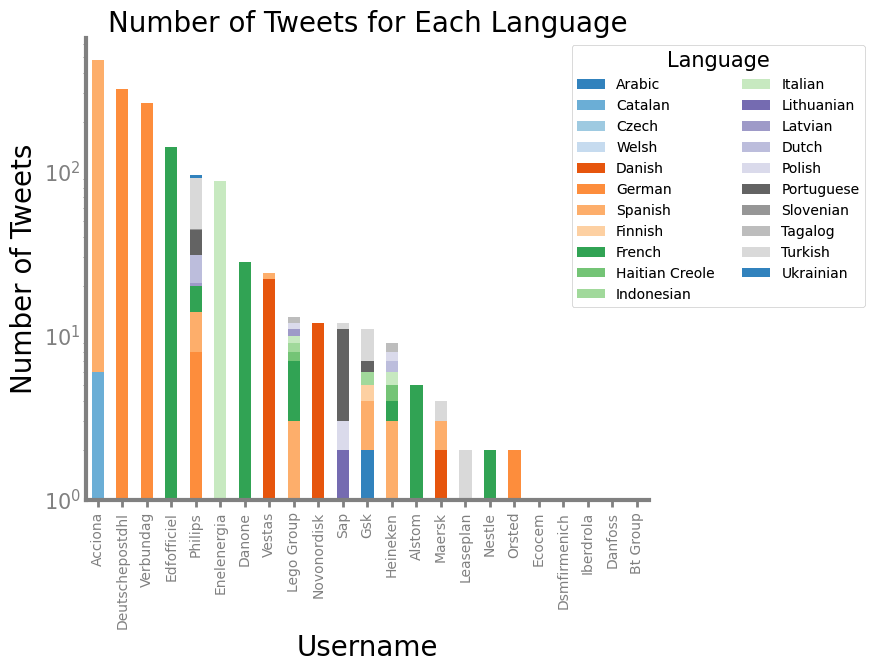

In [24]:
palette = sns.color_palette("tab20c", n_colors=len(df.lang.unique()))
sns.set_palette(palette)

# df.username = df.username.apply(lambda x: format_username(x))
df_plot = df.loc[df.lang != 'en']
df_plot = df_plot.groupby(['lang', 'username']).size().reset_index().pivot(columns='lang', index='username', values=0)
df_plot['total_tweets'] = df_plot.sum(axis=1)
df_plot = df_plot.sort_values(by='total_tweets', ascending=False)

fig, (ax_main, ax_legend) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), gridspec_kw={'width_ratios': [4, 1]})

# Plot Number of Tweets per Day
df_plot.drop(columns='total_tweets').plot(kind='bar', stacked=True, ax=ax_main)
ax_main.set_title('Number of Tweets for Each Language')
ax_main.set_xlabel('Username')
ax_main.set_ylabel('Number of Tweets')
ax_main.set_yscale('log')
ax_main.set_xticklabels(labels = ax_main.get_xticklabels(), fontsize=10)
ax_main.grid(False)
handles, labels = ax_main.get_legend_handles_labels()
labels = [language_map[k] if k in language_map else k for k in labels ]
ax_main.get_legend().remove()

# Legend on the ax_legend
legend = ax_legend.legend(handles, labels, loc="center left", bbox_to_anchor=(-1.1, 0.7), ncol=2, markerscale=0.3, fontsize=10, title="Language")
ax_legend.add_artist(legend)
ax_legend.axis('off')
